In [2]:
true_path = "/home/dhakal/MoBI/src/logs/logs_LUAD_methy/plots/true_labels.npy"
pred_path = "/home/dhakal/MoBI/src/logs/logs_LUAD_methy/plots/raw_predictions.npy"

Reference: https://stackoverflow.com/questions/61086759/how-to-plot-a-roc-curve-from-a-softmax-binary-classifier-with-2-output-neurons

In [3]:
import numpy as np 
import sklearn 

In [4]:
test_y = np.load(true_path)
pred_y = np.load(pred_path)
print(test_y.shape, pred_y.shape)

(112,) (112, 1)


In [5]:
# plotting the ROC Curve 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, RocCurveDisplay


In [6]:
fpr, tpr, _ = roc_curve(test_y, pred_y)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.6923747276688453


In [7]:
fpr.shape, tpr.shape

((38,), (38,))

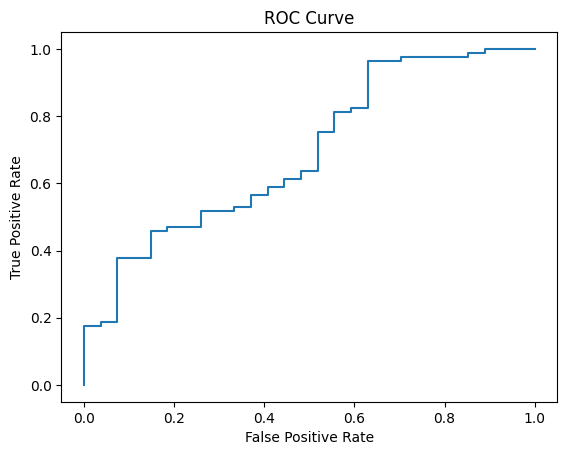

In [8]:
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()  # Plot ROC Curve using predicted probabilities

In [9]:
import os 
root_dir = "logs/"
all_dirs = os.listdir(root_dir)

In [10]:
from collections import defaultdict
test_y_dict = defaultdict(list)
pred_y_dict = defaultdict(list)
data_names_dict = defaultdict(list)
dissalowed_names = ['BRCA', 'KIRP', 'KIRC', "LUSC"]
for dir_name in os.listdir(root_dir):
    if any([name in dir_name for name in dissalowed_names]):
        continue
    true_path = os.path.join(root_dir, dir_name, "plots/true_labels.npy")
    pred_path = os.path.join(root_dir, dir_name, "plots/raw_predictions.npy")
    data_name = dir_name.replace("logs_", "")
    data_key = dir_name.split("_")[1]
    test_y = np.load(true_path)
    pred_y = np.load(pred_path)
    test_y_dict[data_key].append(test_y)
    pred_y_dict[data_key].append(pred_y)
    data_names_dict[data_key].append(data_name)

In [11]:
test_y_dict.keys()

dict_keys(['THCA', 'LUAD', 'ROSMAP', 'UCEC'])

In [12]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(test_y, pred_y, label=None):
    fpr, tpr, _ = roc_curve(test_y, pred_y)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')


In [13]:
def plot_all_roc_curves(test_y_arr, pred_y_arr, data_names_arr):
    plt.figure()
    for test_y, pred_y, name in zip(test_y_arr, pred_y_arr, data_names_arr):
        plot_roc_curve(test_y, pred_y, label=name)
    
    plt.plot([0, 1], [0, 1], 'k--')  # Plotting the diagonal
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc='lower right')
    plt.show()

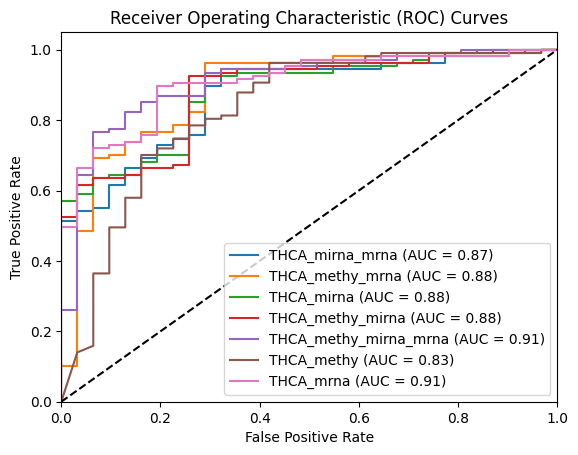

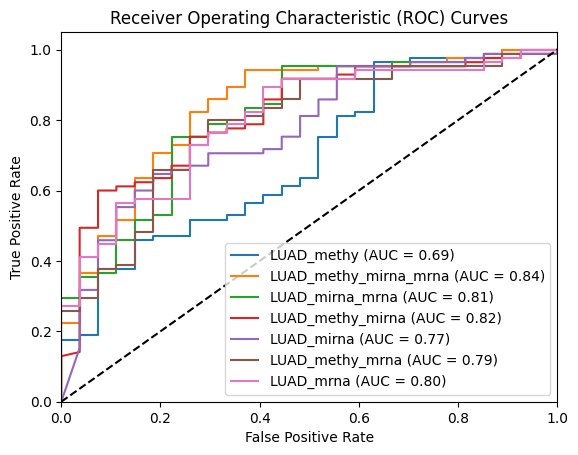

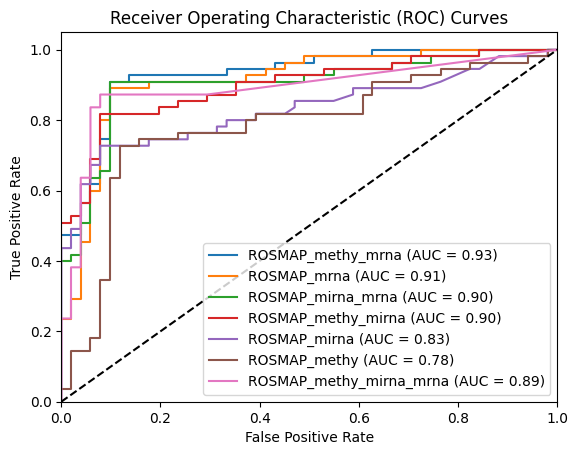

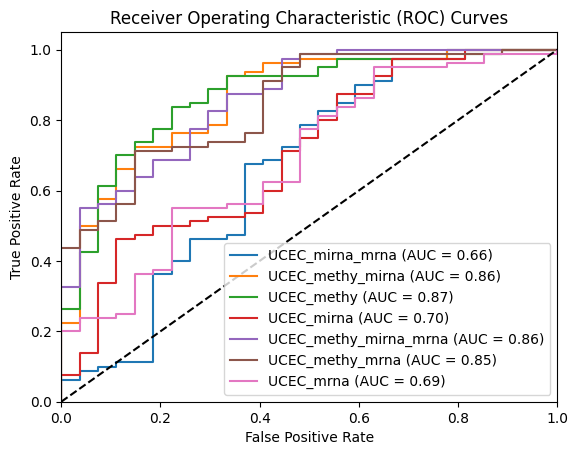

In [14]:
for key in test_y_dict.keys():
    test_y_arr = test_y_dict[key]
    pred_y_arr = pred_y_dict[key]
    data_names_arr = data_names_dict[key]
    plot_all_roc_curves(test_y_arr, pred_y_arr, data_names_arr)

In [15]:
def get_metrics(test_y_arr, pred_y_arr, data_names_arr):
    for test_y, pred_y, name in zip(test_y_arr, pred_y_arr, data_names_arr):
        fpr, tpr, _ = roc_curve(test_y, pred_y)
        roc_auc = auc(fpr, tpr)
        print(f'{name} (AUC = {roc_auc:.2f})')
        pred_y = np.where(pred_y > 0.5, 1, 0)
        accuracy = sklearn.metrics.accuracy_score(test_y, pred_y)
        print(f'{name} (Accuracy = {accuracy:.2f})')
        precision = sklearn.metrics.precision_score(test_y, pred_y)
        print(f'{name} (Precision = {precision:.2f})')
        recall = sklearn.metrics.recall_score(test_y, pred_y)
        print(f'{name} (Recall = {recall:.2f})')
        f1 = sklearn.metrics.f1_score(test_y, pred_y)
        print(f'{name} (F1 = {f1:.2f})')
        print('\n')

In [16]:
for key in test_y_dict.keys():
    test_y_arr = test_y_dict[key]
    pred_y_arr = pred_y_dict[key]
    data_names_arr = data_names_dict[key]
    get_metrics(test_y_arr, pred_y_arr, data_names_arr)

THCA_mirna_mrna (AUC = 0.87)
THCA_mirna_mrna (Accuracy = 0.88)
THCA_mirna_mrna (Precision = 0.91)
THCA_mirna_mrna (Recall = 0.94)
THCA_mirna_mrna (F1 = 0.93)


THCA_methy_mrna (AUC = 0.88)
THCA_methy_mrna (Accuracy = 0.91)
THCA_methy_mrna (Precision = 0.92)
THCA_methy_mrna (Recall = 0.96)
THCA_methy_mrna (F1 = 0.94)


THCA_mirna (AUC = 0.88)
THCA_mirna (Accuracy = 0.88)
THCA_mirna (Precision = 0.92)
THCA_mirna (Recall = 0.93)
THCA_mirna (F1 = 0.92)


THCA_methy_mirna (AUC = 0.88)
THCA_methy_mirna (Accuracy = 0.88)
THCA_methy_mirna (Precision = 0.93)
THCA_methy_mirna (Recall = 0.93)
THCA_methy_mirna (F1 = 0.93)


THCA_methy_mirna_mrna (AUC = 0.91)
THCA_methy_mirna_mrna (Accuracy = 0.88)
THCA_methy_mirna_mrna (Precision = 0.92)
THCA_methy_mirna_mrna (Recall = 0.93)
THCA_methy_mirna_mrna (F1 = 0.93)


THCA_methy (AUC = 0.83)
THCA_methy (Accuracy = 0.88)
THCA_methy (Precision = 0.89)
THCA_methy (Recall = 0.96)
THCA_methy (F1 = 0.92)


THCA_mrna (AUC = 0.91)
THCA_mrna (Accuracy = 0.88)
THCA

In [17]:
from collections import defaultdict
test_y_dict = defaultdict(list)
pred_y_dict = defaultdict(list)
data_names_dict = defaultdict(list)
allowed_names = ['BRCA']
for dir_name in os.listdir(root_dir):
    data_key = dir_name.split("_")[1]
    if data_key not in allowed_names:
        print(f"Dir name no allowed: {dir_name}")
        continue
    true_path = os.path.join(root_dir, dir_name, "plots/true_labels.npy")
    pred_path = os.path.join(root_dir, dir_name, "plots/raw_predictions.npy")
    data_name = dir_name.replace("logs_", "")
    data_key = dir_name.split("_")[1]
    test_y = np.load(true_path)
    pred_y = np.load(pred_path)
    test_y_dict[data_key].append(test_y)
    pred_y_dict[data_key].append(pred_y)
    data_names_dict[data_key].append(data_name)

Dir name no allowed: logs_THCA_mirna_mrna


FileNotFoundError: [Errno 2] No such file or directory: 'logs/logs_BRCA_mrna/plots/true_labels.npy'

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
def get_metrics_multilabel(test_y_arr, pred_y_arr, data_names_arr):
    for test_y, pred_y, name in zip(test_y_arr, pred_y_arr, data_names_arr):
        test_y_labels = np.argmax(test_y, axis=1)
        pred_y_labels = np.argmax(pred_y, axis=1)
        accuracy = accuracy_score(test_y_labels, pred_y_labels)
        print(f'{name} (Accuracy = {accuracy:.2f})')
         # F1 macro
        f1_macro = f1_score(test_y_labels, pred_y_labels, average='macro')
        print(f"F1 Macro: {f1_macro:.4f}")
        
        # F1 weighted
        f1_weighted = f1_score(test_y_labels, pred_y_labels, average='weighted')
        print(f"F1 Weighted: {f1_weighted:.4f}")
        
        # Precision macro
        precision_macro = precision_score(test_y_labels, pred_y_labels, average='macro')
        print(f"Precision Macro: {precision_macro:.4f}")
        
        # Recall macro
        recall_macro = recall_score(test_y_labels, pred_y_labels, average='macro')
        print(f"Recall Macro: {recall_macro:.4f}")
        print('\n')

In [ ]:
for key in test_y_dict.keys():
    test_y_arr = test_y_dict[key]
    pred_y_arr = pred_y_dict[key]
    data_names_arr = data_names_dict[key]
    get_metrics_multilabel(test_y_arr, pred_y_arr, data_names_arr)

BRCA_mrna (Accuracy = 0.83)
F1 Macro: 0.2266
F1 Weighted: 0.9062
Precision Macro: 0.2500
Recall Macro: 0.2071


BRCA_methy_mirna (Accuracy = 0.71)
F1 Macro: 0.2778
F1 Weighted: 0.8333
Precision Macro: 0.3333
Recall Macro: 0.2381


BRCA_methy_mrna (Accuracy = 0.83)
F1 Macro: 0.2266
F1 Weighted: 0.9062
Precision Macro: 0.2500
Recall Macro: 0.2071


BRCA_mirna_mrna (Accuracy = 0.83)
F1 Macro: 0.2266
F1 Weighted: 0.9062
Precision Macro: 0.2500
Recall Macro: 0.2071


BRCA_methy (Accuracy = 0.66)
F1 Macro: 0.2644
F1 Weighted: 0.7931
Precision Macro: 0.3333
Recall Macro: 0.2190


BRCA_methy_mirna_mrna (Accuracy = 0.71)
F1 Macro: 0.2778
F1 Weighted: 0.8333
Precision Macro: 0.3333
Recall Macro: 0.2381


BRCA_mirna (Accuracy = 0.74)
F1 Macro: 0.2131
F1 Weighted: 0.8525
Precision Macro: 0.2500
Recall Macro: 0.1857




/home/dhakal/anaconda3/envs/ADomics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dhakal/anaconda3/envs/ADomics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dhakal/anaconda3/envs/ADomics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dhakal/anaconda3/envs/ADomics/lib/python3.9/site-